<a href="https://colab.research.google.com/github/smwalter96/Decision_Tree/blob/master/HW5/PUS20_HW5_MatthewWalter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [ ]:
!pip install geopandas

In [ ]:
!pip install mapclassify

In [ ]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import mapclassify

# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

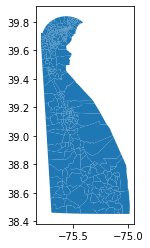

In [ ]:
de_elecp = gp.read_file('https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson')
de_elecp.plot()

This figure shows a map of the voter precincts in Delaware.

In [ ]:
de_elecp.head()

OBJECTID  ...                                           geometry
0         1  ...  POLYGON ((-75.67816 39.74598, -75.67807 39.746...
1         2  ...  POLYGON ((-75.72394 39.76115, -75.72393 39.760...
2         3  ...  POLYGON ((-75.73601 39.68660, -75.73603 39.686...
3         4  ...  POLYGON ((-75.69655 39.66154, -75.69666 39.661...
4         5  ...  POLYGON ((-75.75158 39.65865, -75.75109 39.658...

[5 rows x 7 columns]

## read in turnout data - keep only election district, and votes


In [ ]:
turnout = pd.read_csv('https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv')
turnout = turnout[["election_district", "votes"]]
turnout

election_district  votes
0                01-01    581
1                01-01     51
2                01-01      5
3                01-01      6
4                02-01    937
...                ...    ...
4719             07-41    545
4720             08-41    191
4721             08-41    335
4722             Total   3388
4723             Total   5262

[4724 rows x 2 columns]

## group turnout data by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [ ]:
turnout = turnout.groupby('election_district').sum()
turnout.head()

votes
election_district       
01-01               2519
01-02               3632
01-03               2347
01-04               4676
01-05               3973

## merge the turnout data with the electoral map


In [ ]:
de_elecmap = de_elecp.merge(turnout, right_on = 'election_district', left_on = 'EDRD_2012')
de_elecmap

OBJECTID   ID  ...                                           geometry  votes
0           1   20  ...  POLYGON ((-75.67816 39.74598, -75.67807 39.746...   2598
1           2   21  ...  POLYGON ((-75.72394 39.76115, -75.72393 39.760...   4390
2           3   22  ...  POLYGON ((-75.73601 39.68660, -75.73603 39.686...    690
3           4   23  ...  POLYGON ((-75.69655 39.66154, -75.69666 39.661...   4399
4           5   24  ...  POLYGON ((-75.75158 39.65865, -75.75109 39.658...   2722
..        ...  ...  ...                                                ...    ...
424       426  424  ...  POLYGON ((-75.12161 38.45119, -75.12186 38.451...   4719
425       427  425  ...  POLYGON ((-75.43038 38.65207, -75.43017 38.651...   2202
426       428  426  ...  POLYGON ((-75.36290 38.58543, -75.36268 38.585...   2086
427       429  427  ...  POLYGON ((-75.27245 38.80446, -75.27254 38.804...   1197
428       430  428  ...  POLYGON ((-75.40755 38.71621, -75.40730 38.716...    301

[429 rows x 8 columns]

In [ ]:
de_elecmap = de_elecmap.to_crs({'init': 'epsg:3857'})
de_elecmap["pop_density"] = (de_elecmap['POPULATION']) / (de_elecmap['geometry'].area/ 10**6)
de_elecmap

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


OBJECTID   ID  ... votes  pop_density
0           1   20  ...  2598   695.840135
1           2   21  ...  4390   308.527645
2           3   22  ...   690  1604.725621
3           4   23  ...  4399   509.866670
4           5   24  ...  2722   791.115124
..        ...  ...  ...   ...          ...
424       426  424  ...  4719    42.181179
425       427  425  ...  2202    31.038743
426       428  426  ...  2086    82.446777
427       429  427  ...  1197    54.229567
428       430  428  ...   301    13.043157

[429 rows x 9 columns]

# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

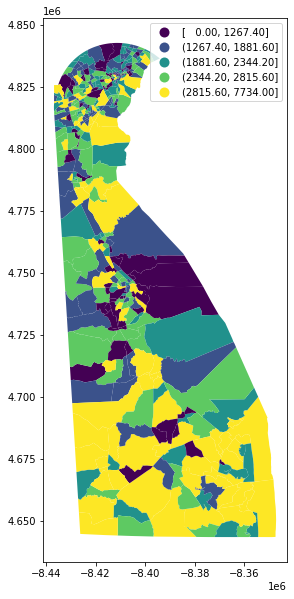

In [ ]:
# this is just an option for one of the plot. choose your esthetic and functionality as you see fit
fig, ax = plt.subplots(1, figsize=(4.5,10))
de_elecmap.plot(ax=ax, column = 'POPULATION', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})


This map shows population counts by voter precinct, with brighter yellow having higher population and dark blue having lower population.

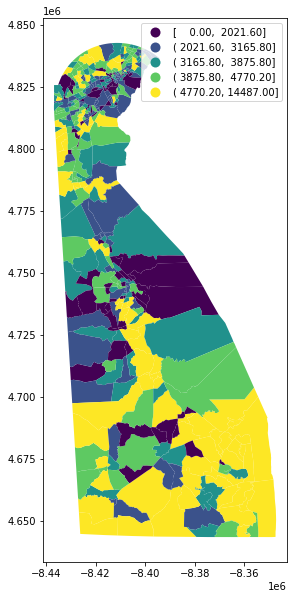

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
de_elecmap.plot(ax=ax, column = 'votes', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})


This map shows total vote counts by voter precinct, with brighter yellow having higher number of votes and dark blue having lower number of votes.

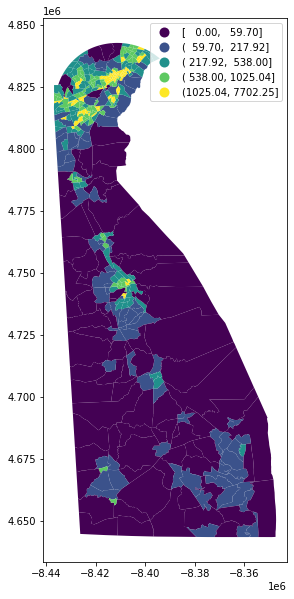

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
de_elecmap.plot(ax=ax, column = 'pop_density', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})


This map shows population density by voter precinct, with brighter yellow having higher population density and dark blue having lower population density. Higher densities are seen in New Castle County.

# look at the variables' correlation

In [ ]:
import scipy as sp

In [ ]:
de_elecmap.corr()

OBJECTID        ID  POPULATION     votes  pop_density
OBJECTID     1.000000  0.991589    0.037839  0.178269    -0.353189
ID           0.991589  1.000000    0.036542  0.178375    -0.352912
POPULATION   0.037839  0.036542    1.000000  0.624456    -0.031784
votes        0.178269  0.178375    0.624456  1.000000    -0.222397
pop_density -0.353189 -0.352912   -0.031784 -0.222397     1.000000

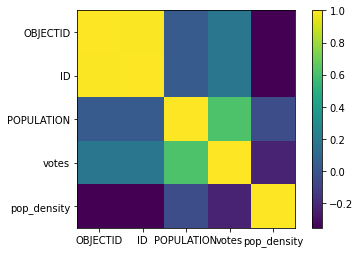

In [ ]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();

This correlation plot visualizes correlation between ID, population, votes, and population density variables. Brighter yellow squares have a higher correlation close to 1 and darker blue have lower correlation. Votes and population are shown to have higher correlation with each other at around .8.

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

plot the model over the data

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [ ]:
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# note: if you clean the data differently or do split train and test the result will not be identical


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mod = smf.ols(formula='votes ~ POPULATION', data=de_elecmap)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.24e-48
Time:                        23:35:48   Log-Likelihood:                -3778.5
No. Observations:                 429   AIC:                             7561.
Df Residuals:                     427   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    897.8943    182.592      4.917      0.000     539.003    1256.786
POPULATION     1.3020      0.079     16.521      0.000       1.147       1.457
==============================================================================
Omnibus:                      144.314   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.455
Skew:                           1.206   Prob(JB):                    3.77e-253
Kurtosis:                      10.695   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

mod = smf.ols(formula='votes ~ I(POPULATION**2) + POPULATION', 
              data=de_elecmap)
res2 = mod.fit() 

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           9.99e-60
Time:                        23:35:48   Log-Likelihood:                -3747.7
No. Observations:                 429   AIC:                             7501.
Df Residuals:                     426   BIC:                             7514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -503.6456    242.502     -2.077      0.038    -980.294     -26.997
I(POPULATION ** 2)    -0.0003   3.64e-05     -8.111      0.000      -0.000      -0.000
POPULATION             2.7284      0.191     14.317      0.000       2.354       3.103
==============================================================================
Omnibus:                      194.221   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.105
Skew:                           1.820   Prob(JB):                    3.98e-284
Kurtosis:                      10.731   Cond. No.                     2.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

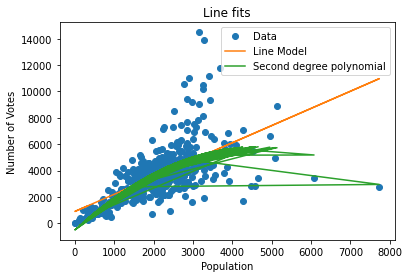

In [ ]:
plt.plot(de_elecmap['POPULATION'], de_elecmap['votes'], 'o')
plt.plot(de_elecmap.POPULATION, res.predict(de_elecmap))
plt.plot(de_elecmap.POPULATION, res2.predict(de_elecmap))
plt.title('Line fits')
plt.legend(['Data', 'Line Model', 'Second degree polynomial'])
plt.xlabel('Population')
plt.ylabel('Number of Votes');

This scatterplot plots out all the number of vote data points by population. The line fit from the linear model is plotted in orange while the second degree polynomial fit is plotted in green.

# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



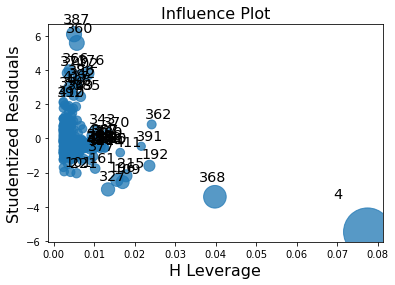

In [ ]:
sm.graphics.influence_plot(res);

This influence plot shows the amount of influence that each data point has on the line fit in the linear model. Bigger points represent more influence.

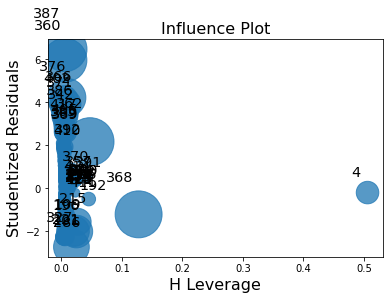

In [ ]:
sm.graphics.influence_plot(res2);

This influence plot shows the amount of influence that each data point has on the fit of the second degree polynomial model. Bigger points represent more influence.

# Compare the models with the Likelihood Ration test (follow example in class)


In [ ]:
res2.compare_lr_test(res)

(61.606214669798646, 4.194925183501481e-15, 1.0)

In [ ]:
train, test = train_test_split(
    de_elecmap, test_size=0.3)


In [ ]:
mod = smf.ols(formula='votes ~ POPULATION', data=train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           3.57e-33
Time:                        23:35:50   Log-Likelihood:                -2649.1
No. Observations:                 300   AIC:                             5302.
Df Residuals:                     298   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    978.2113    217.341      4.501      0.000     550.493    1405.929
POPULATION     1.2570      0.092     13.620      0.000       1.075       1.439
==============================================================================
Omnibus:                       98.729   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.145
Skew:                           1.124   Prob(JB):                    5.18e-161
Kurtosis:                      10.348   Cond. No.                     5.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mod = smf.ols(formula='votes ~ I(POPULATION**2) + POPULATION', 
              data=test)
res2 = mod.fit() 

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     49.11
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.70e-16
Time:                        23:35:50   Log-Likelihood:                -1125.3
No. Observations:                 129   AIC:                             2257.
Df Residuals:                     126   BIC:                             2265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -459.4642    563.685     -0.815      0.417   -1574.981     656.052
I(POPULATION ** 2)    -0.0003      0.000     -2.398      0.018      -0.001   -5.18e-05
POPULATION             2.7012      0.542      4.980      0.000       1.628       3.775
==============================================================================
Omnibus:                       73.009   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.825
Skew:                           1.838   Prob(JB):                    2.36e-105
Kurtosis:                      11.726   Cond. No.                     2.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

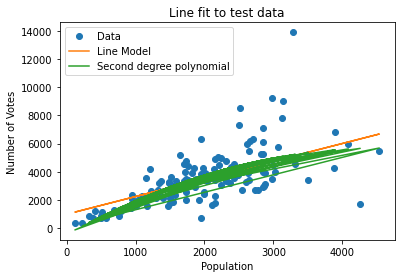

In [ ]:
plt.plot(test['POPULATION'], test['votes'], 'o')
plt.plot(test.POPULATION, res.predict(test))
plt.title('Line fit to test data')
plt.plot(test.POPULATION, res2.predict(test))
plt.legend(['Data', 'Line Model', 'Second degree polynomial'])
plt.xlabel('Population')
plt.ylabel('Number of Votes');

This plot shows the testing data (30%) of original dataset with the linear fit and second degree polynomial fit from the training data (70%).


# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

1. Model of population and vote count with linear fit without train/test split:

R2 is a measure of how well a model explains variation in the model. This model has an R2 of .39, indicating the variation in total voters is somewhat explained by total population and a linear fit. Adjusted R2 is R2 adjusted for amount of input data and parameters. The adjusted R2 is similar to R2 at .389 indicating that the data points and parameters have little effect on the R2 measured from the model. The p-value is a measure of the statistical significance of the correlation between the variables. The p-values of .000 indicate a significant correlation between population and number of votes. Correlation coefficients that are large and positive indicate a positive correlation between the variables as seen in this model. These results show a strong positive linear correlation between number of votes and population.

The influence plot shows that the outlier on the right has a large influence on the model prediction. The central points all have a lesser influence on the model.

2. Model of population and vote count with a second degree polynomial fit without train/test split:

The R2 and adjusted R2 of .472 and .469 indicate a good fit of the model, with better fit than the linear model. The low p-values indicate a significant correlation between the number of votes and population. The Population coefficient of 2.7 shows a positive correlation between the two variables. The results of this model show that a better fit is given with the second degree polynomial than the linear fit.

The influence plot shows that the outliers have less effect on the line fit. The more central values all have more influence.

3. Model of population and vote count with linear fit with train/test split:

The R2 and adjusted R2 of .384 and .382 show that some of the variance in votes can be explained by the model. However, this is lower than when all of the data was used to train the model. The coefficient of 1.25 is also lower than when all data was used, but still indicates a positive correlation between number of votes and population. The low p-value indicates a significant correlation.

4. Model of population and vote count with a second degree polynomial fit with train/test split:


The R2 and adjusted R2 of .438 and .429 show just under half of the variation in the data can be explained by the polynomial fit. This is not much that the second model which ran the polynomial model with all of the data. The coefficient of 2.7 is similar to the second model, indicating a positive correlation between votes and population. This also indicates that a good fit can be achieved through this model with the testing data. The low p-values indicate a significant result.

# Extra Credit: Collect any other variable about Delaware that you think may be relevant to predit turn out and fit a line model using that as an exogenous variable.

You have a few options here: 
- dig for some other variable that is available at the electoral precinct level 
- get a variable at the county level , which means that the endogenous variable (votes) will be far more granular than the exogenous one... how would you deal with it?
- get a variable at a hith resolution geomeetry, such as census block or census tract, and merge the geometry. This is the hardest option. The Census bureau offers advise on conversion between geometries

Discuss your model: what it means mathematically and what it means in practice


The following dataset has voter registration data by senate district.



In [ ]:
senate = gp.read_file('https://opendata.arcgis.com/datasets/7f5a42e0a3284c0a857a4ed549ca8b6e_0.geojson')
senate.head()

OBJECTID  ...                                           geometry
0         1  ...  POLYGON ((-75.65667 39.66398, -75.65671 39.664...
1         2  ...  POLYGON ((-75.56513 39.56056, -75.56493 39.560...
2         3  ...  POLYGON ((-75.56045 39.72966, -75.56053 39.729...
3         4  ...  POLYGON ((-75.56705 39.55420, -75.56708 39.554...
4         5  ...  POLYGON ((-75.75944 39.29668, -75.76005 39.296...

[5 rows x 41 columns]

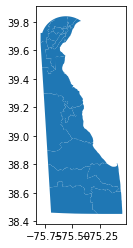

In [ ]:
senate.plot()

This map shows the senate districts in Delaware.

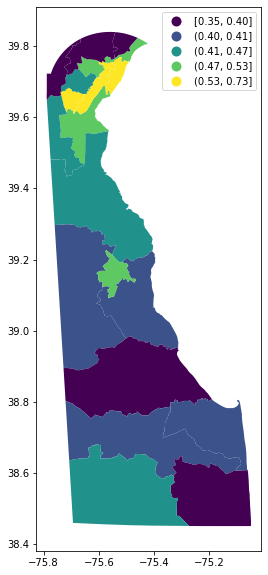

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
senate.plot(ax=ax, column = 'F_DEMOCRAT', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})

This map shows the fraction of registered voters who are democrat by senate district. Brighter yellow represents a higher democratic fraction while dark blue represents a lower democratic fraction.

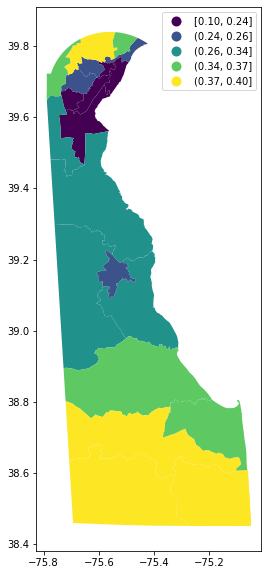

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
senate.plot(ax=ax, column = 'F_REPUBLIC', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})

This map shows the fraction of registered voters who are republican by senate district. Brighter yellow represents a higher republican fraction while dark blue represents a lower republican fraction.

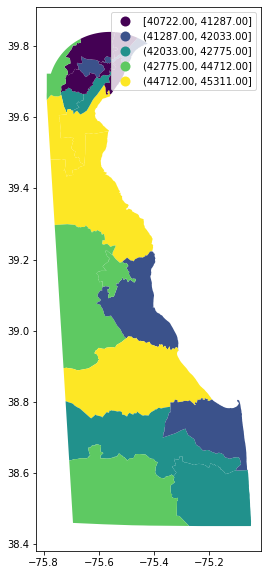

In [ ]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
senate.plot(ax=ax, column = 'POPULATION', scheme='quantiles', legend = True, legend_kwds={'loc': 'upper right'})

This map shows the total population by senate district. Brighter yellow represents a higher population while dark blue represents a population fraction.

In [ ]:
senate1 = senate[['POPULATION', 'F_DEMOCRAT', 'F_REPUBLIC']]
senate1.corr()

POPULATION  F_DEMOCRAT  F_REPUBLIC
POPULATION    1.000000   -0.252416    0.218426
F_DEMOCRAT   -0.252416    1.000000   -0.969780
F_REPUBLIC    0.218426   -0.969780    1.000000

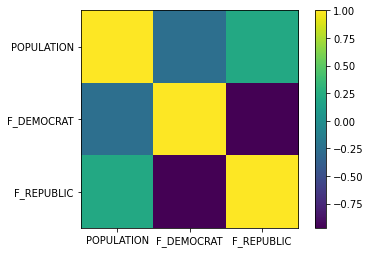

In [ ]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(senate1.corr())
plt.xticks(range(len(senate1.corr())), senate1.corr().columns)
plt.yticks(range(len(senate1.corr())), senate1.corr().columns)
plt.colorbar();

This correlation plot shows the correlation between population, fraction of democrat and fraction of republican. Republican and population has a positive correlation while population and democrat have a negative correlation.

In [ ]:
mod = smf.ols(formula='F_DEMOCRAT ~ POPULATION', data=senate)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             F_DEMOCRAT   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.293
Date:                Mon, 05 Oct 2020   Prob (F-statistic):              0.270
Time:                        23:35:52   Log-Likelihood:                 19.860
No. Observations:                  21   AIC:                            -35.72
Df Residuals:                      19   BIC:                            -33.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1677      0.612      1.907      0.072      -0.114       2.449
POPULATION -1.627e-05   1.43e-05     -1.137      0.270   -4.62e-05    1.37e-05
==============================================================================
Omnibus:                        3.217   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.056
Skew:                           0.766   Prob(JB):                        0.358
Kurtosis:                       3.073   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mod1 = smf.ols(formula='F_REPUBLIC ~ POPULATION', data=senate)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             F_REPUBLIC   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9519
Date:                Mon, 05 Oct 2020   Prob (F-statistic):              0.341
Time:                        23:35:52   Log-Likelihood:                 22.383
No. Observations:                  21   AIC:                            -40.77
Df Residuals:                      19   BIC:                            -38.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2368      0.543     -0.436      0.668      -1.373       0.900
POPULATION  1.238e-05   1.27e-05      0.976      0.341   -1.42e-05    3.89e-05
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.980
Skew:                          -0.338   Prob(JB):                        0.613
Kurtosis:                       2.185   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

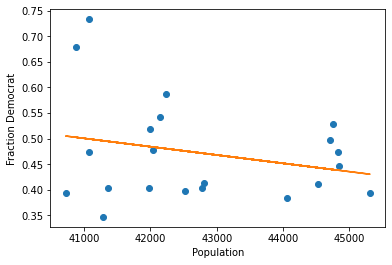

In [ ]:
plt.plot(senate['POPULATION'], senate['F_DEMOCRAT'], 'o')
plt.plot(senate.POPULATION, res.predict(senate))
plt.ylabel('Fraction Democrat')
plt.xlabel('Population');

This plot shows the fraction of democrat and population data with the model fit.

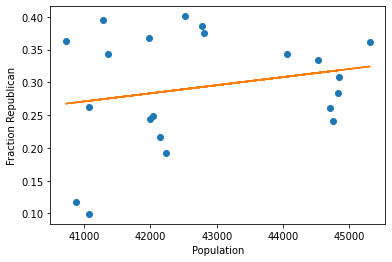

In [ ]:
plt.plot(senate['POPULATION'], senate['F_REPUBLIC'], 'o')
plt.plot(senate.POPULATION, res1.predict(senate))
plt.ylabel('Fraction Republican')
plt.xlabel('Population');

This plot shows the fraction of republican and population data with the model fit.

The low R2 of .064 indicates a poor fit in the model linear model of fraction democrat and population. The even lower adjusted R2 shows the same result and that the amount of data points may be low. The low negative coefficient shows a negative to no correlation between fraction democrat and population. The high p-value indicates a non-significant result.

The low R2 and adjusted R2 of the linear model with fraction republican and population indicates a poor fit of the model. The low positive coefficient shows a small to no positive correlation between fraction republican and population. The high p-values indicate non-significant results.

A better model may take population density into account as the districts may have been created to have similar populations.